#**Marketing Analytics**

Análise exploratória de dados de uma campanha de marketing com 2240 clientes da empresa XYZ.
Esta análise tem por objetivo responder as seguintes perguntas:

- Qual o perfil de clientes desta empresa?
- Qual campanha de marketing teve mais sucesso?
- Quais produtos estão performando melhor? E quais estão performando pior?
- Qual o desempenho dos canais de venda da empresa?
- Qual a quantidade gasta em produto por país de localização do cliente?
- Considerando o canal de vendas com melhor perfomance, qual a quantidade de compras realizadas em relação ao estado civil, grau de instrução e dependentes dos clientes?

In [ ]:
#Importando o dataset

import pandas as pd
url = 'https://raw.githubusercontent.com/theresarocha/EDA_Marketing/main/dataset/marketing_data.csv'
dados = pd.read_csv(url)

In [ ]:
#Visualizando as dez primeiras linhas do dataset
dados.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [ ]:
#Quantidade de linhas e colunas
dados.shape

(2240, 28)

In [ ]:
#Informações sobre as variáveis do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Podemos observar que temos 28 variáveis neste dataset, sendo elas do tipo inteiro e objeto.

As variáveis são as seguintes:

- ID = ID do cliente.
- Year_Birth = Ano de aniversário do cliente.
- Education = Grau de instrução do cliente.
- Marital_Status = Estado civil.
- Income = Renda familiar anual do cliente.
- Kidhome = Quantidade de crianças em casa.
- Teenhome = Quantidade de adolescentes em casa.
- Dt_Customer = Data de entrada do cliente na empresa.
- Recency = Quantidade de dias desde a última compra do cliente.
- MntWines = Quantidade gasta em vinho nos últimos dois anos.
- MntFruits = Quantidade gasta em frutas nos últimos dois anos.
- MntMeatProducts = Quantidade gasta em carne nos últimos dois anos.
- MntFishProducts = Quantidade gasta em peixe nos últimos dois anos.
- MntSweetProducts = Quantidade gasta em doces nos últimos dois anos.
- MntGoldProds = Quantidade gasta em ouro nos últimos dois anos.
- NumDealsPurchases = Quantidade de compras feitas com desconto.
- NumWebPurchases = Quantidade de compras realizadas pelo site.
- NumCatalogPurchases = Quantidade de compras feitas usando um catálogo.
- NumStorePurchases = Quantidade de compras feitas diariamente nas lojas.
- NumWebVisitsMonth = Quantidade de visitas ao site da empresa no último mês.
- AcceptedCmp1 = 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário.
- AcceptedCmp2 = 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário.
- AcceptedCmp3 = 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário.
- AcceptedCmp4 = 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário.
- AcceptedCmp5 = 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário.
- Response = 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário.
- Complain = 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.
- Country = País de localização do cliente.

In [ ]:
#Verificando variáveis com elementos nulos
dados.isnull().mean()[dados.isnull().sum()!= 0].sort_values(ascending = False)

 Income     0.010714
dtype: float64

Apenas uma variável possui dados nulos (Income) com pouco mais de 1% de dados faltantes.

In [ ]:
#Importando a biblioteca missingno para visualização dos dados faltantes
import missingno as msno

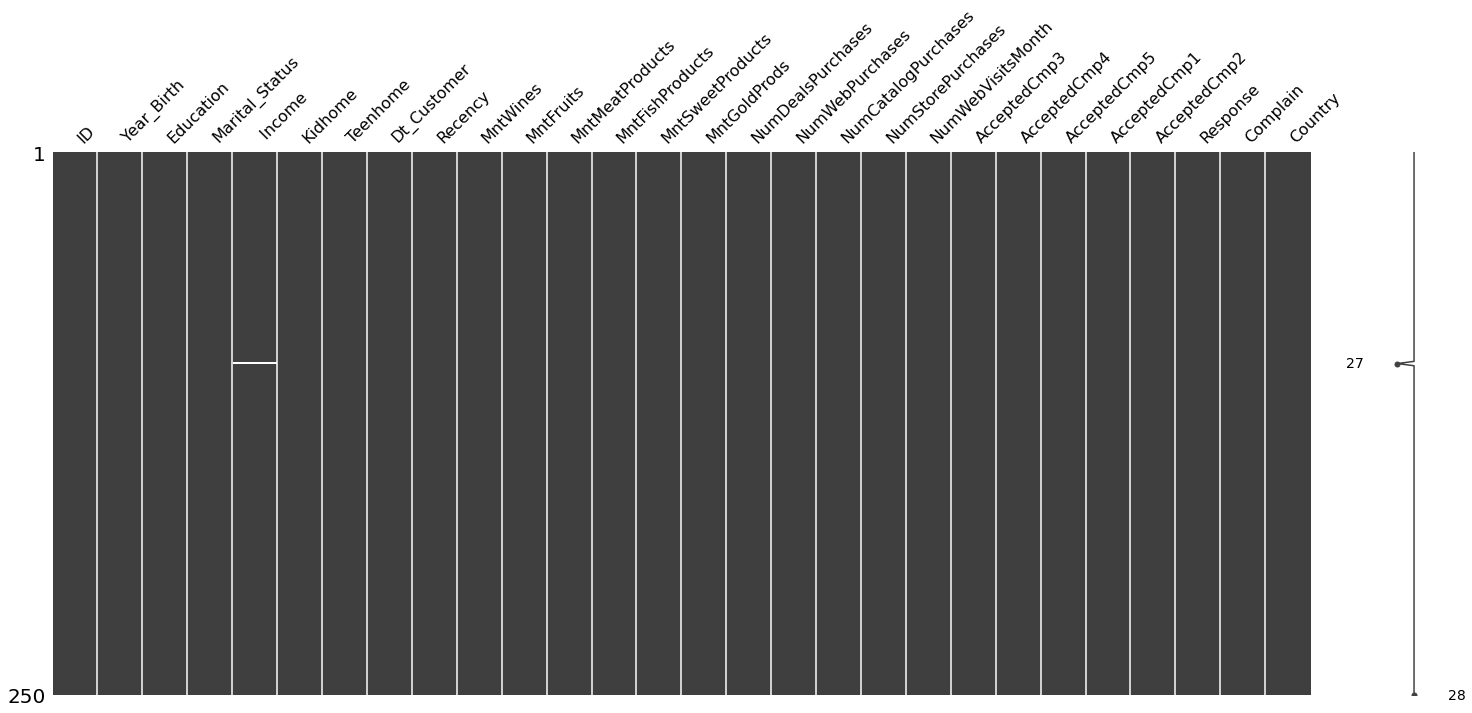

In [ ]:
%matplotlib inline
msno.matrix(dados.sample(250))

Aqui podemos observar claramente que há dados falantes na variável Income.

#**Limpeza e Transformação de Dados**

In [ ]:
#Removendo espaço no nome da variável Income
dados.rename(columns={' Income ': 'Income'}, inplace = True)
print(dados.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [ ]:
#Removendo caracteres especiais, vírgula e convertendo variável Income para float
def conv_float(x):
    try:
        return  pd.to_numeric(x.replace('$','').replace(',',''))
    except:
        if type(x) == float:
            return x
        else:
            return 'NA'       

dados['Income'] = dados['Income'].apply(lambda x:conv_float(x))

In [ ]:
#Verificando variável Income
dados['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [ ]:
#Média dos valores da variável Income
round(dados['Income'].mean(),2)

52247.25

In [ ]:
#Completando valores NA em Income com a média da variável
dados['Income'].fillna(value = round(dados['Income'].mean(),2), inplace = True)

In [ ]:
#Checando se há valores nulos na variável Income
pd.isnull(dados['Income']).sum()

0

In [ ]:
#Convertendo as variáveis ID, Response e Complain de números inteiros para string
colunas = ['ID', 'Response', 'Complain']
dados[colunas] = str(colunas)

In [ ]:
#Convertendo a variável Dt_Customer de string para data
dados['Dt_Customer'] = pd.to_datetime(dados['Dt_Customer'], format = '%m/%d/%y')

In [ ]:
#Checando a variável Dt_Customer
dados['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [ ]:
#Nome dos países estão em formato de siglas
dados['Country'].head()

0     SP
1     CA
2     US
3    AUS
4     SP
Name: Country, dtype: object

In [ ]:
#Instalando biblioteca pycountry
!pip install pycountry

In [ ]:
#Convertendo siglas dos países pelo seu respectivo nome

import pycountry

def conv_pais(y):
    try:
        return pycountry.countries.get(alpha_2 = y[:2]).name
    except:
        return y      

dados['Country'] = dados['Country'].apply(conv_pais)

In [ ]:
#Verificando aplicação da função dos países
dados['Country'].head(10)

0               SP
1           Canada
2    United States
3        Australia
4               SP
5               SP
6          Georgia
7               SP
8    United States
9            India
Name: Country, dtype: object

In [ ]:
#Alterando Georgia (Estado) para Germany (país) e sigla SP para Spain
def conv_pais_2(z):
    try:
        return  (z.replace('Georgia','Germany').replace('SP','Spain'))
    except:
      return z      

dados['Country'] = dados['Country'].apply(conv_pais_2)

In [ ]:
#Checando variável Country
dados['Country'].head(30)

0             Spain
1            Canada
2     United States
3         Australia
4             Spain
5             Spain
6           Germany
7             Spain
8     United States
9             India
10    United States
11            Spain
12            India
13           Canada
14            Spain
15            Spain
16            Spain
17            Spain
18           Canada
19           Canada
20     Saudi Arabia
21            India
22          Germany
23            Spain
24            India
25            Spain
26            Spain
27            Spain
28            Spain
29           Canada
Name: Country, dtype: object

In [ ]:
#Criando a variável Dependentes a partir das variáveis KidHome e TeenHome
dados['Dependentes'] = dados['Kidhome'] + dados['Teenhome']

In [ ]:
#Checando a variável Dependentes
dados['Dependentes'].head(10)

0    0
1    0
2    1
3    2
4    1
5    0
6    0
7    1
8    1
9    1
Name: Dependentes, dtype: int64

In [ ]:
#Criando a variável Idade a partir da variável Year_Birth
dados['Idade'] = 2021 - dados['Year_Birth']

In [ ]:
#Checando a variável Idade
dados['Idade'].head(10)

0    51
1    60
2    63
3    54
4    32
5    63
6    67
7    54
8    67
9    67
Name: Idade, dtype: int64

In [ ]:
#Idade Máxima
dados['Idade'].max()

128

Podemos observar que a idade máxima dos clientes desta empresa é 128 anos. Qual a probabilidade de um cliente desta empresa ter esta idade? Vamos analisar melhor a variável Year_Birth (Ano de Nascimento).

In [ ]:
#Verificado todas as frequências de Ano de Nascimento
dados.groupby('Year_Birth')['Year_Birth'].count()

Year_Birth
1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
1948    21
1949    30
1950    29
1951    43
1952    52
1953    35
1954    50
1955    49
1956    55
1957    43
1958    53
1959    51
1960    49
1961    36
1962    44
1963    45
1964    42
1965    74
1966    50
1967    44
1968    51
1969    71
1970    77
1971    87
1972    79
1973    74
1974    69
1975    83
1976    89
1977    52
1978    77
1979    53
1980    39
1981    39
1982    45
1983    42
1984    38
1985    32
1986    42
1987    27
1988    29
1989    30
1990    18
1991    15
1992    13
1993     5
1994     3
1995     5
1996     2
Name: Year_Birth, dtype: int64

Há três valores bem distintintos do restante dos dados desta variável: os anos de 1893, 1899 e 1900. Por isso, as idades máximas de 128, 122 e 121 anos, respectivamente. Teria sido um input de dados errado?

Vamos substituir estes três valores pela média da variável.

In [ ]:
#Média da variável Year_Birth
round(dados['Year_Birth'].mean())

1969

In [ ]:
#Substituindo os valores pela média
dados['Year_Birth'] = dados['Year_Birth'].replace([1893,1899,1900],1969)

In [ ]:
#Refazendo a variável Idade
dados['Idade'] = 2021 - dados['Year_Birth']

In [ ]:
#Idade máxima
dados['Idade'].max()

81

Agora temos idade máxima dos clintes de 81 anos.

In [ ]:
#Informações sobre as variáveis do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Agora, após a etapa de tratamento e limpeza dos dados, podemos observar que temos 30 variáveis neste dataset, as mesmas 28 anteriormente citadas com o acréscimo das variáveis Dependentes e Idade.

As variáveis deste conjunto de dados são do tipo inteiro, objeto, números reais e data.

In [ ]:
#Algumas medidas descritivas das variáveis
dados.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Dependentes,Idade
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.901786,52247.251339,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.950446,52.098214
std,11.694076,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.751803,11.694076
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,51.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,62.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,81.000000


A média de idade dos clientes desta empresa é de 52 anos. A idade mínima dos clientes é de 25 anos e a máxima de 81 anos.

A média de renda familiar anual por cliente é de 52247,25 dólares. A renda máxima é de aproximadamente 667 mil dólares e a mínima é de 1730 dólares.

Os clientes desta empresa têm, no máximo, três dependentes em casa.

#**Análise Exploratória de Dados**

##**Qual Perfil dos Clientes da Empresa?**

###**Estado Civil**

In [ ]:
#Frequência absoluta
dados.groupby('Marital_Status')['Marital_Status'].count()

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
#Alterando estado civil Absurd para Absent (pessoas casadas que vivem separadas)
def conv_estado_civil(e):
    try:
        return  (e.replace('Absurd','Absent'))
    except:
      return e     

dados['Marital_Status'] = dados['Marital_Status'].apply(conv_estado_civil)

In [ ]:
#Frequência relativa
((dados.groupby('Marital_Status')['Marital_Status'].count())/dados.shape[0]).sort_values()

Marital_Status
Absent      0.000893
YOLO        0.000893
Alone       0.001339
Widow       0.034375
Divorced    0.103571
Single      0.214286
Together    0.258929
Married     0.385714
Name: Marital_Status, dtype: float64

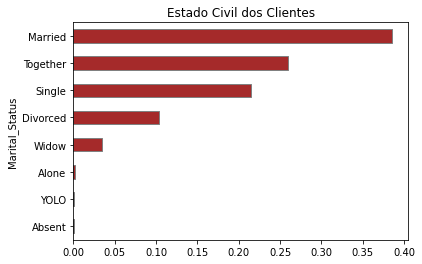

In [ ]:
#Gráfico da frequência relativa percentual
((dados.groupby('Marital_Status')['Marital_Status'].count())/dados.shape[0]).sort_values().plot(kind='barh', color = 'brown', edgecolor = 'grey', title = 'Estado Civil dos Clientes');

Cerca de 40% dos clientes são casados, seguidos pelos que moram juntos 25,9% e solteiros 21,43%. Os divorciados representam 10,36% e clientes viúvas 3,44% do total.

###**País de Localização dos Clientes**

In [ ]:
#Frequência absoluta
dados.groupby('Country')['Country'].count()

Country
Australia         160
Canada            268
Germany           120
India             148
Montenegro          3
Saudi Arabia      337
Spain            1095
United States     109
Name: Country, dtype: int64

In [ ]:
#Frequência relativa
((dados.groupby('Country')['Country'].count())/dados.shape[0]).sort_values()

Country
Montenegro       0.001339
United States    0.048661
Germany          0.053571
India            0.066071
Australia        0.071429
Canada           0.119643
Saudi Arabia     0.150446
Spain            0.488839
Name: Country, dtype: float64

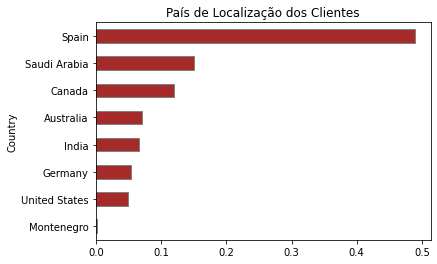

In [ ]:
#Gráfico da frequência relativa percentual
((dados.groupby('Country')['Country'].count())/dados.shape[0]).sort_values().plot(kind='barh', color = 'brown', edgecolor = 'grey', title = 'País de Localização dos Clientes');

Observa-se que 48,89% dos clientes são da Espanha, quase metade de todos os consumidores desta empresa. Em seguida, pessoas da Arábia Saudita 15,05%, Canadá 11,96%, Austrália 7,14%, Índia 6,61%, Alemanha 5,36%, Estados Unidos 4,87% e Montenegro 0,13% fazem parte da carteira de clientes desta organização.

###**Idade**

In [ ]:
#Criando grupo de idades com cortes de 10 em 10 anos
cortesi = [0, 25, 35, 45, 55, 65, 75, 85]
nomesi = ['[18,25]', '[26,35]', '[36,45]', '[46,55]','[56,65]','[66,75]','[76,85]']
dados['Idade_Grupos'] = pd.cut(dados['Idade'], bins = cortesi, labels = nomesi)

In [ ]:
#Frequência relativa da variável Idade dividida em grupos
((dados.groupby('Idade_Grupos')['Idade_Grupos'].count())/dados.shape[0]).sort_values()

Idade_Grupos
[18,25]    0.000893
[76,85]    0.010714
[26,35]    0.083482
[66,75]    0.152232
[56,65]    0.219643
[36,45]    0.225893
[46,55]    0.307143
Name: Idade_Grupos, dtype: float64

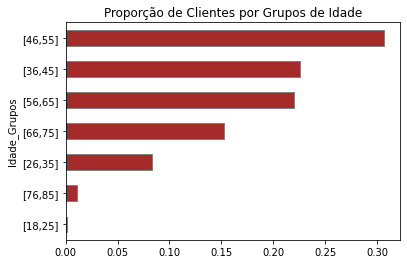

In [ ]:
#Gráfico da frequência relativa da variável Idade dividida em grupos
((dados.groupby('Idade_Grupos')['Idade_Grupos'].count())/dados.shape[0]).sort_values().plot(kind = 'barh', color = 'brown', edgecolor = 'grey', title = 'Proporção de Clientes por Grupos de Idade');

Os quatro grupos de idades com maiores proporções entre todos os clientes desta empresa são:

entre 46 e 55 anos - 30,71%
entre 36 e 45 anos - 22,59%
entre 56 e 65 anos - 21,97%
entre 66 e 75 anos - 15,22%
Os mais jovens - entre 25 e 35 anos - representam pouco mais de 8% dos clientes.

A faixa etária entre 76 e 85 anos apresentou proporção de 10,71% dos clientes.

###**Dependentes**

In [ ]:
#Frequência absoluta
dados.groupby('Dependentes')['Dependentes'].count()

Dependentes
0     638
1    1128
2     421
3      53
Name: Dependentes, dtype: int64

In [ ]:
#Frequência relativa
((dados.groupby('Dependentes')['Dependentes'].count())/dados.shape[0]).sort_values()

Dependentes
3    0.023661
2    0.187946
0    0.284821
1    0.503571
Name: Dependentes, dtype: float64

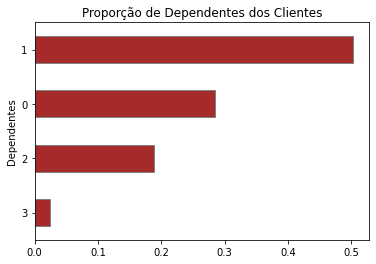

In [ ]:
#Gráfico da frequência relativa percentual
((dados.groupby('Dependentes')['Dependentes'].count())/dados.shape[0]).sort_values().plot(kind ='barh', color = 'brown', edgecolor = 'grey', title = 'Proporção de Dependentes dos Clientes');

A maior proporção dos clientes têm apenas um filho (50,36%) e a menor proporção (2,37%) têm três filhos.

28,48% não possuem filhos e 18,79% têm dois filhos.

###**Grau de Instrução**

In [ ]:
#Frequência absoluta
dados.groupby('Education')['Education'].count()

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: Education, dtype: int64

In [ ]:
#Frequência relativa
((dados.groupby('Education')['Education'].count())/dados.shape[0]).sort_values()

Education
Basic         0.024107
2n Cycle      0.090625
Master        0.165179
PhD           0.216964
Graduation    0.503125
Name: Education, dtype: float64

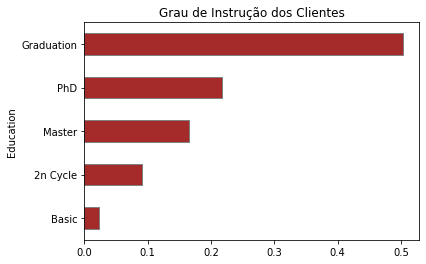

In [ ]:
#Gráfico da frequência relativa percentual
((dados.groupby('Education')['Education'].count())/dados.shape[0]).sort_values().plot(kind = 'barh', color = 'brown', edgecolor = 'grey', title = 'Grau de Instrução dos Clientes');

A maior parte dos clientes possui pós-graduação, representando 50,31%. Em sequência, 21,71% dos clientes têm PhD, 16,52% possuem mestrado, 9,06% possuem pós-graduação (2n Cycle em alguns países e universidades pode ser conhecido como pós-graduação) e 2,41% têm graduação.

Podemos concluir que todos os clientes desta organização têm grau de instrução elevado, seja por possuírem uma graduação ou até mesmo doutorado.

###**Renda Familiar Anual**

In [ ]:
#Gerando um intervalo de classes da variável Income
dados['Renda_Familiar'] = pd.cut(dados['Income'], bins = [1000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000,700000], labels = ['1k a 10k', '11k a 20k', '21k a 30k', '31k a 40k','41k a 50k', '51k a 60k','61k a 70k','71k a 80k', '81k a 90k', '91k a 100k', 'Acima de 100k'])

In [ ]:
#Frequência absoluta
dados.groupby('Renda_Familiar')['Renda_Familiar'].count()

Renda_Familiar
1k a 10k          29
11k a 20k         98
21k a 30k        243
31k a 40k        362
41k a 50k        328
51k a 60k        339
61k a 70k        333
71k a 80k        291
81k a 90k        164
91k a 100k        40
Acima de 100k     13
Name: Renda_Familiar, dtype: int64

In [ ]:
#Frequência relativa
((dados.groupby('Renda_Familiar')['Renda_Familiar'].count())/dados.shape[0]).sort_values()

Renda_Familiar
Acima de 100k    0.005804
1k a 10k         0.012946
91k a 100k       0.017857
11k a 20k        0.043750
81k a 90k        0.073214
21k a 30k        0.108482
71k a 80k        0.129911
41k a 50k        0.146429
61k a 70k        0.148661
51k a 60k        0.151339
31k a 40k        0.161607
Name: Renda_Familiar, dtype: float64

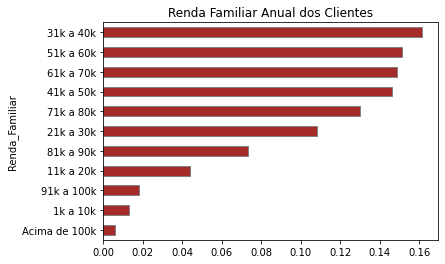

In [ ]:
#Gráfico da frequência relativa percentual
((dados.groupby('Renda_Familiar')['Renda_Familiar'].count())/dados.shape[0]).sort_values().plot(kind ='barh', color = 'brown', edgecolor = 'grey', title = 'Renda Familiar Anual dos Clientes' );

A maior proporção de clientes desta empresa possui renda familiar anual entre 31 a 40 mil dólares, representando 16,16% do total. A menor parcela recebe acima de 100 mil dólares representando menos de 0,6% do total.

Podemos concluir que a maior parte dos clientes desta empresa são casados, têm entre 46 e 55 anos, residem na Espanha e possuem apenas um filho. Têm como grau de instrução pós-graduação e uma renda familiar anual entre 31 e 40 mil dólares.

##**Qual campanha de marketing teve mais sucesso?**

In [ ]:
#Usando a função melt do pandas para concatenar as variáveis das campanhas e seus valores
cmp_concat = dados.melt(value_vars = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], var_name = 'campanhas', value_name = 'success', ignore_index = True)

In [ ]:
cmp_success = cmp_concat[cmp_concat['success'] == 1]

In [ ]:
#Importando as bibliotecas seaborn, numpy e matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Atualizando a versão matplotlib
!pip install --upgrade matplotlib

     |████████████████████████████████| 10.3 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


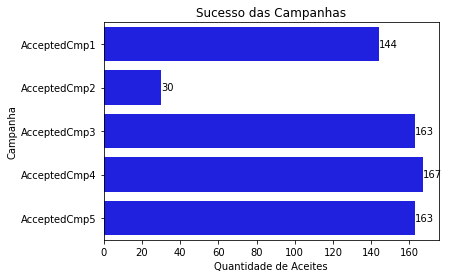

In [ ]:
#Gráfico das campanhas de marketing computando os aceites dos clientes
barplot = sns.barplot(y = 'campanhas', x = 'success', data = cmp_success, ci = None, estimator = np.sum, color = 'blue')

#Título e eixos do gráfico
plt.title('Sucesso das Campanhas')
plt.ylabel('Campanha')
plt.xlabel('Quantidade de Aceites')

#Rótulos do gráfico
barplot.bar_label(barplot.containers[0])

#Plotagem do gráfico
plt.show()

Em relação ao sucesso de cada campanha, a campanha 4 se sobressaiu com 167 aceites dos clientes. 

Em seguida as campanhas 3 e 5 com 163 aceites e a campanha 1 teve 144 aceites.

A pior performance foi referente a campanha 2 com apenas 30 aceites dos clientes.

##**Quais produtos estão performando melhor? E quais estão performando pior?**

In [ ]:
#Usando a função melt do pandas para concatenar as variáveis dos produtos e seus valores
prod_concat = dados.melt(value_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], var_name = 'produtos', value_name = 'quantidade', ignore_index = True)

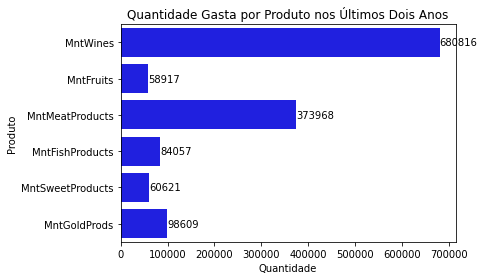

<Figure size 720x576 with 0 Axes>

In [ ]:
#Gráfico dos produtos e quantidade gasta em cada um
barplot1 = sns.barplot(y = 'produtos', x = 'quantidade', data = prod_concat, ci = None, estimator = np.sum, color = 'blue')

#Título e eixos do gráfico
plt.title('Quantidade Gasta por Produto nos Últimos Dois Anos')
plt.ylabel('Produto')
plt.xlabel('Quantidade')

#Rótulos do gráfico
plt.figure(figsize=(10,8))
barplot1.bar_label(barplot1.containers[0])

#Plotagem do gráfico
plt.show()

O produto com melhor performance na empresa é vinho com pouco mais de 680 mil unidades comprados pelos clientes.

Em seguida produtos como carne, ouro e peixe têm boa performance.

Os produtos com pior performence são frutas e doces.

##**Qual o desempenho dos canais de venda da empresa?**

In [ ]:
#Usando a função melt do pandas para concatenar as variáveis dos canais de venda e seus valores
canais_concat = dados.melt(value_vars = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], var_name = 'canais', value_name = 'compras', ignore_index = True)

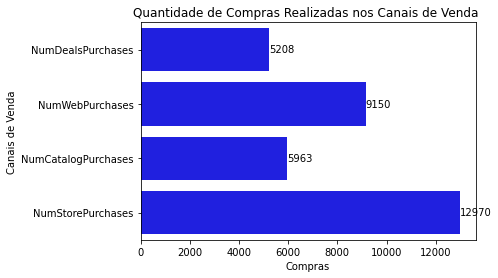

<Figure size 720x576 with 0 Axes>

In [ ]:
#Gráfico do desempenho dos canais de venda
barplot2 = sns.barplot(y = 'canais', x = 'compras', data = canais_concat, ci = None, estimator = np.sum, color = 'blue')

#Título e eixos do gráfico
plt.title('Quantidade de Compras Realizadas nos Canais de Venda ')
plt.ylabel('Canais de Venda')
plt.xlabel('Compras')

#Rótulos do gráfico
plt.figure(figsize=(10,8))
barplot2.bar_label(barplot2.containers[0])

#Plotagem do gráfico
plt.show()

A maior quantidade de compras feitas pelos consumidores é através das lojas (quantidade considerando compras realizadas diariamente) com aproximadamente 13 mil compras.

Compras realizadas pelo site vêm em seguida apresentando boa performance, com 9150 compras feitas pelos clientes.

Os canais de vendas com pior performance são compras feitas usando um catálogo (5963) e realizadas com desconto (5208). 

##**Qual a quantidade gasta em produtos por país de localização do cliente?**

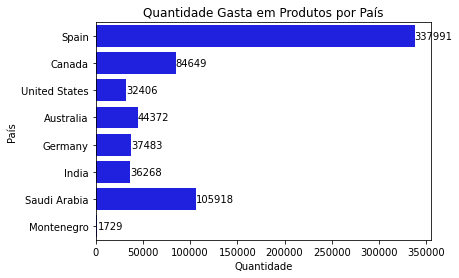

<Figure size 720x576 with 0 Axes>

In [ ]:
#Gráfico da quantidade gasta em produtos e país do cliente
barplot3 = sns.barplot(y = dados['Country'], x = 'quantidade', data = prod_concat, ci = None, estimator = np.sum, color = 'blue')

#Título e eixos do gráfico
plt.title('Quantidade Gasta em Produtos por País')
plt.ylabel('País')
plt.xlabel('Quantidade')

#Rótulos do gráfico
plt.figure(figsize=(10,8))
barplot3.bar_label(barplot3.containers[0])

#Plotagem do gráfico
plt.show()

Podemos observar que a Espanha é o país com maior quantidade gasta em produtos por clientes nos últimos dois anos.

Em sequência, Arábia Saudita com quase 106 mil produtos consumidos e Canadá com 84649 produtos.

Os países que menos consomem em produtos da empresa são Montenegro e Estados Unidos, respectivamente.

##**Considerando o canal de vendas com melhor perfomance, qual a quantidade de compras realizadas em relação a: estado civil, grau de instrução e dependentes dos clientes?**

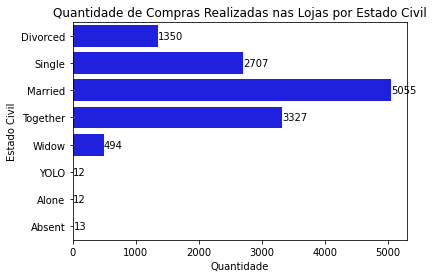

<Figure size 720x576 with 0 Axes>

In [ ]:
#Gráfico da quantidade de compras no canal com melhor perfomance em relação ao estado civil
barplot4 = sns.barplot(y = dados['Marital_Status'], x = dados['NumStorePurchases'], data = dados, ci = None, estimator = np.sum, color = 'blue')

#Título e eixos do gráfico
plt.title('Quantidade de Compras Realizadas nas Lojas por Estado Civil')
plt.ylabel('Estado Civil')
plt.xlabel('Quantidade')

#Rótulos do gráfico
plt.figure(figsize=(10,8))
barplot4.bar_label(barplot4.containers[0])

#Plotagem do gráfico
plt.show()

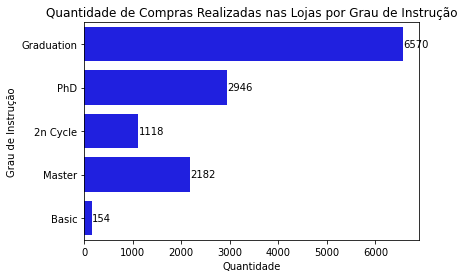

<Figure size 720x576 with 0 Axes>

In [ ]:
#Gráfico da quantidade de compras no canal com melhor perfomance em relação ao grau de instrução
barplot5 = sns.barplot(y = dados['Education'], x = dados['NumStorePurchases'], data = dados, ci = None, estimator = np.sum, color = 'blue')

#Título e eixos do gráfico
plt.title('Quantidade de Compras Realizadas nas Lojas por Grau de Instrução')
plt.ylabel('Grau de Instrução')
plt.xlabel('Quantidade')

#Rótulos do gráfico
plt.figure(figsize=(10,8))
barplot5.bar_label(barplot5.containers[0])

#Plotagem do gráfico
plt.show()

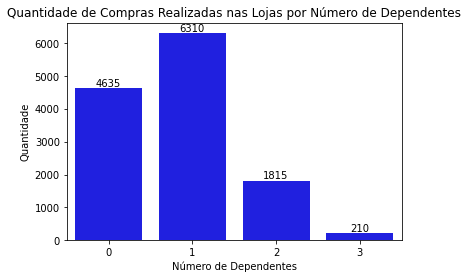

<Figure size 720x576 with 0 Axes>

In [ ]:
#Gráfico da quantidade de compras no canal com melhor perfomance em relação ao número de dependentes
barplot6 = sns.barplot(x = dados['Dependentes'], y = dados['NumStorePurchases'], data = dados, ci = None, estimator = np.sum, color = 'blue')

#Título e eixos do gráfico
plt.title('Quantidade de Compras Realizadas nas Lojas por Número de Dependentes')
plt.xlabel('Número de Dependentes')
plt.ylabel('Quantidade')

#Rótulos do gráfico
plt.figure(figsize=(10,8))
barplot6.bar_label(barplot6.containers[0])

#Plotagem do gráfico
plt.show()